In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

L2_1 = [10 ** p for p in range(2, 8)]
L2_2 = [10 ** p for p in range(2, 8)]

# L2_1 = [50, 100, 200, 500]
# L2_2 = [50000000, 100000000, 200000000]
RHO = 0
# RHO = [100]
DELTA = 0
MAX_ITER = 1
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [100, 1000, 10000, 100000, 1000000, 10000000],
 'l2_2': [100, 1000, 10000, 100000, 1000000, 10000000],
 'rho': 0,
 'delta': 0,
 'max_iterations': 1}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


/home/jdepauw/TEASER/teaser/algorithm/teaser_s.py:132: RuntimeWarning: divide by zero encountered in true_divide
  beta /= (XTX_diag + self.l2_1 + 2 * self.rho)


norm E 75323.75619331861
diag norm: 432.8461541375095
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.014
Average Recall@100 0.024
Average nDCG@100 0.013
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.30302157006630653
diag norm: 0.28641629875018426
diag_diff: 0.9251081969226276


Evaluating with 1000 users
Average Recall@20 0.328
Average Recall@100 0.534
Average nDCG@100 0.216
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0365695345628823
diag norm: 0.03079315172295047
diag_diff: 0.08447894574692473


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.531
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.003824410499002258
diag norm: 0.0031080052752244327
diag_diff: 0.008379811051213075


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00038480127503099206
diag norm: 0.0003110983113259739
diag_diff: 0.0008373125578411289


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 100, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 3.850488475934918e-05
diag norm: 3.111282119176123e-05
diag_diff: 8.372458289730039e-05


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 197.78214747671353
diag norm: 14.44185233744105
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.107
Average Recall@100 0.168
Average nDCG@100 0.077
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.21566957380865695
diag norm: 0.2493393788215475
diag_diff: 0.9155069208685835


Evaluating with 1000 users
Average Recall@20 0.33
Average Recall@100 0.539
Average nDCG@100 0.22
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.03225724158559317
diag norm: 0.029995283925960962
diag_diff: 0.08421517346617709


Evaluating with 1000 users
Average Recall@20 0.333
Average Recall@100 0.534
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.003693799265270958
diag norm: 0.0030979386402811746
diag_diff: 0.008376377273460987


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003828632881627948
diag norm: 0.00031099322775607514
diag_diff: 0.0008372766810902897


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 1000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 3.848443571737955e-05
diag norm: 3.111176487471546e-05
diag_diff: 8.37242222841212e-05


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 32.51267617742929
diag norm: 12.208537791196346
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.122
Average Recall@100 0.209
Average nDCG@100 0.087
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.10385848101128341
diag norm: 0.16352502996381663
diag_diff: 0.8969455441105572


Evaluating with 1000 users
Average Recall@20 0.344
Average Recall@100 0.543
Average nDCG@100 0.226
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.02292595257375536
diag norm: 0.026181278123643285
diag_diff: 0.08307835124914181


Evaluating with 1000 users
Average Recall@20 0.329
Average Recall@100 0.537
Average nDCG@100 0.218
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0032556341364689705
diag norm: 0.0030176779751232173
diag_diff: 0.008349456812842144


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.533
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003697666315815411
diag norm: 0.0003099858172036065
diag_diff: 0.0008369325688280491


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 10000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 3.8290572252123245e-05
diag norm: 3.11012556720347e-05
diag_diff: 8.372063382999393e-05


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.629736084446099
diag norm: 0.27521746674356207
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.296
Average Recall@100 0.469
Average nDCG@100 0.193
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.031870415556398426
diag norm: 0.07146964316144457
diag_diff: 0.8830175071591704


Evaluating with 1000 users
Average Recall@20 0.358
Average Recall@100 0.553
Average nDCG@100 0.228
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.011049372196939243
diag norm: 0.017254454267480835
diag_diff: 0.08099461727452464


Evaluating with 1000 users
Average Recall@20 0.346
Average Recall@100 0.539
Average nDCG@100 0.225
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.002313138797623281
diag norm: 0.0026344830677049423
diag_diff: 0.008233635716805859


Evaluating with 1000 users
Average Recall@20 0.331
Average Recall@100 0.536
Average nDCG@100 0.217
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.000325877413788631
diag norm: 0.00030195487493588514
diag_diff: 0.0008342349921321688


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.533
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 3.69805493892007e-05
diag norm: 3.100050712609984e-05
diag_diff: 8.368621524480941e-05


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.53
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.02763101468697897
diag norm: 0.032327205880680464
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.299
Average Recall@100 0.501
Average nDCG@100 0.197
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.006987494679486549
diag norm: 0.01981034058302257
diag_diff: 0.8784750666622039


Evaluating with 1000 users
Average Recall@20 0.355
Average Recall@100 0.556
Average nDCG@100 0.22
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.003372021435007533
diag norm: 0.007505709780697545
diag_diff: 0.0795936162069384


Evaluating with 1000 users
Average Recall@20 0.358
Average Recall@100 0.553
Average nDCG@100 0.228
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0011141041228883305
diag norm: 0.0017366276167808993
diag_diff: 0.008022276955524906


Evaluating with 1000 users
Average Recall@20 0.347
Average Recall@100 0.539
Average nDCG@100 0.225
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.00023152919472696015
diag norm: 0.00026361664129799246
diag_diff: 0.0008226310747808438


Evaluating with 1000 users
Average Recall@20 0.331
Average Recall@100 0.536
Average nDCG@100 0.217
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 1000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 3.259089702505465e-05
diag norm: 3.019736400298799e-05
diag_diff: 8.341640216859609e-05


Evaluating with 1000 users
Average Recall@20 0.332
Average Recall@100 0.533
Average nDCG@100 0.215
Training model TEASER_S with hyperparameters {'l2_1': 100, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0014549014015083242
diag norm: 0.004377569876648992
diag_diff: inf


Evaluating with 1000 users
Average Recall@20 0.272
Average Recall@100 0.461
Average nDCG@100 0.18
Training model TEASER_S with hyperparameters {'l2_1': 1000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0011903531746146206
diag norm: 0.0036366659733765012
diag_diff: 0.8772622509125584


Evaluating with 1000 users
Average Recall@20 0.303
Average Recall@100 0.498
Average nDCG@100 0.198
Training model TEASER_S with hyperparameters {'l2_1': 10000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0007324681020697348
diag norm: 0.0020701981923908273
diag_diff: 0.0792655050464023


Evaluating with 1000 users
Average Recall@20 0.352
Average Recall@100 0.551
Average nDCG@100 0.218
Training model TEASER_S with hyperparameters {'l2_1': 100000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0003396185206570124
diag norm: 0.0007548898735243432
diag_diff: 0.00788167001044778


Evaluating with 1000 users
Average Recall@20 0.359
Average Recall@100 0.553
Average nDCG@100 0.228
Training model TEASER_S with hyperparameters {'l2_1': 1000000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 0.0001115056907136541
diag norm: 0.00017377731563826383
diag_diff: 0.0008014645385518224


Evaluating with 1000 users
Average Recall@20 0.347
Average Recall@100 0.539
Average nDCG@100 0.225
Training model TEASER_S with hyperparameters {'l2_1': 10000000, 'l2_2': 10000000, 'rho': 0, 'delta': 0, 'max_iterations': 1}
Decompose DTD


norm E 2.3155082968722927e-05
diag norm: 2.636335239589247e-05
diag_diff: 8.225579192877287e-05


Evaluating with 1000 users
Average Recall@20 0.331
Average Recall@100 0.536
Average nDCG@100 0.217



In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.22814587822795693 achieved with {'l2_1': 1000, 'l2_2': 100000, 'rho': 0, 'delta': 0, 'max_iterations': 1}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.031870415556398426
diag norm: 0.07146964316144457
diag_diff: 0.8830175071591704


CPU times: user 5min 53s, sys: 1min 17s, total: 7min 10s
Wall time: 17.6 s


In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 1500 users
Average Recall@20 0.339
Average Recall@100 0.539
Average nDCG@100 0.228


## Plot amount of items from long tail recommended

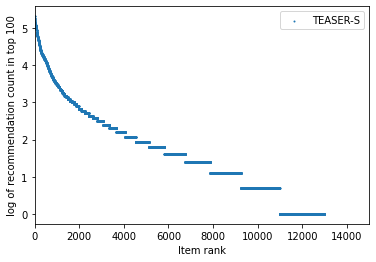

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)